In [1]:
import os
from google.colab import files
uploaded = files.upload()
print(os.getcwd())

Saving fifa_eda_stats.csv to fifa_eda_stats.csv
/content


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
from scipy import stats


dataframe= pd.read_csv("fifa_eda_stats.csv")
dataframe

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,Right,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,Right,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


#Data Cleaning

Removing the Duplicate values

In [3]:
dataframe.drop_duplicates()
dataframe.sample(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1832,238463,A. Haidara,20,Mali,75,84,FC Red Bull Salzburg,€10M,€24K,Right,...,78.0,59.0,69.0,66.0,7.0,11.0,8.0,7.0,10.0,€17M
5663,176645,Z. Zlámal,32,Czech Republic,69,69,Heart of Midlothian,€600K,€3K,Right,...,65.0,29.0,23.0,41.0,68.0,69.0,69.0,72.0,72.0,€1.1M
8335,204445,M. Smith,29,Northern Ireland,67,67,Heart of Midlothian,€575K,€3K,Right,...,65.0,67.0,69.0,66.0,13.0,9.0,16.0,7.0,14.0,€1M
2993,240289,Calero,22,Spain,73,82,Real Valladolid CF,€5.5M,€13K,Right,...,70.0,73.0,73.0,72.0,11.0,13.0,7.0,14.0,7.0,€13.2M
14487,222402,J. Gulley,25,New Zealand,61,64,NaN,€0,€0,Right,...,41.0,60.0,58.0,57.0,15.0,11.0,12.0,14.0,15.0,NaN
11607,238743,H. Wright,20,United States,64,77,FC Schalke 04,€875K,€5K,Right,...,57.0,20.0,20.0,18.0,5.0,15.0,12.0,8.0,9.0,€2M
10599,223653,C. Jopia,26,Chile,65,66,CD Huachipato,€525K,€1K,Left,...,59.0,62.0,64.0,61.0,12.0,14.0,9.0,14.0,9.0,€748K
11234,192566,M. Janzer,26,Germany,64,65,Eintracht Braunschweig,€525K,€2K,Right,...,60.0,40.0,46.0,45.0,14.0,9.0,9.0,11.0,7.0,€801K
12572,229507,T. Mahrer,28,Austria,63,63,SV Mattersburg,€300K,€4K,Right,...,64.0,59.0,60.0,65.0,7.0,9.0,13.0,7.0,15.0,€435K
2000,199383,T. Klose,30,Switzerland,75,75,Norwich City,€4.9M,€25K,Right,...,73.0,75.0,76.0,74.0,15.0,10.0,11.0,15.0,10.0,€9.4M


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

# Droping unnessesory columns

In [5]:
dataframe.drop(columns=['International Reputation','Jersey Number','Loaned From','Weight'],axis=1,inplace=True)
dataframe.isna().sum()

ID                         0
Name                       0
Age                        0
Nationality                0
Overall                    0
Potential                  0
Club                     241
Value                      0
Wage                       0
Preferred Foot            48
Weak Foot                 48
Skill Moves               48
Work Rate                 48
Body Type                 48
Position                  60
Joined                  1553
Contract Valid Until     289
Height                    48
Crossing                  48
Finishing                 48
HeadingAccuracy           48
ShortPassing              48
Volleys                   48
Dribbling                 48
Curve                     48
FKAccuracy                48
LongPassing               48
BallControl               48
Acceleration              48
SprintSpeed               48
Agility                   48
Reactions                 48
Balance                   48
ShotPower                 48
Jumping       

In [6]:
dataframe.fillna(dataframe.median(),inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    18207 non-null  int64  
 1   Name                  18207 non-null  object 
 2   Age                   18207 non-null  int64  
 3   Nationality           18207 non-null  object 
 4   Overall               18207 non-null  int64  
 5   Potential             18207 non-null  int64  
 6   Club                  17966 non-null  object 
 7   Value                 18207 non-null  object 
 8   Wage                  18207 non-null  object 
 9   Preferred Foot        18159 non-null  object 
 10  Weak Foot             18207 non-null  float64
 11  Skill Moves           18207 non-null  float64
 12  Work Rate             18159 non-null  object 
 13  Body Type             18159 non-null  object 
 14  Position              18147 non-null  object 
 15  Joined             

<ipython-input-6-67df65a68450>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.fillna(dataframe.median(),inplace=True)


# What is the distribution of the players AGE ?

<Axes: xlabel='Age', ylabel='Density'>

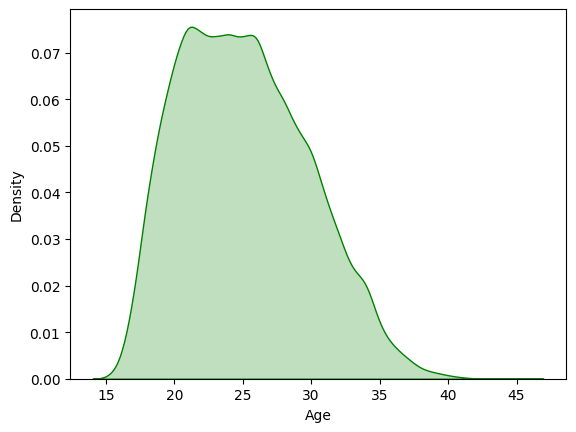

In [9]:
sns.kdeplot(dataframe['Age'], fill=True, color='g')

# How many players in each position?

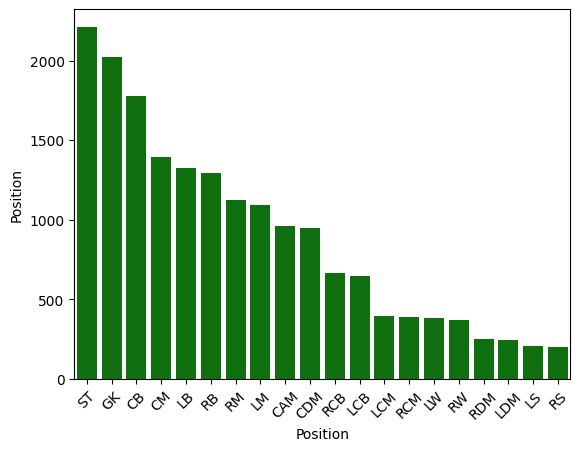

In [17]:
c = pd.DataFrame(dataframe.groupby("Position")['Position'].count().sort_values(ascending=False).head(20))
sns.barplot(data = c, x=c.index , y='Position',color = 'Green')
plt.xticks(rotation = 45);


# what is the range of overall evaluation for the football players ?

<Axes: xlabel='Overall', ylabel='Count'>

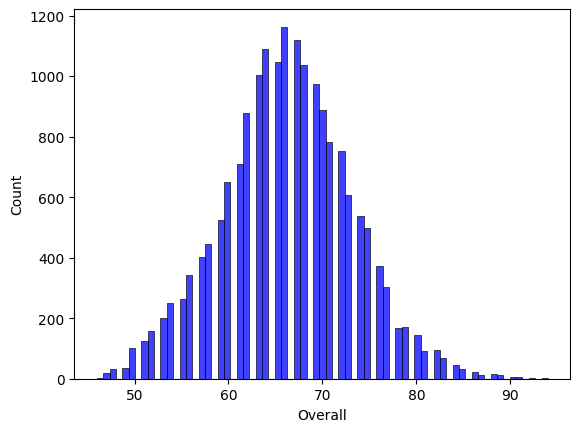

In [13]:
sns.histplot(dataframe['Overall'],color = 'b')


# What is the relation between the Value the fifa put for the player and wage the players take in fact

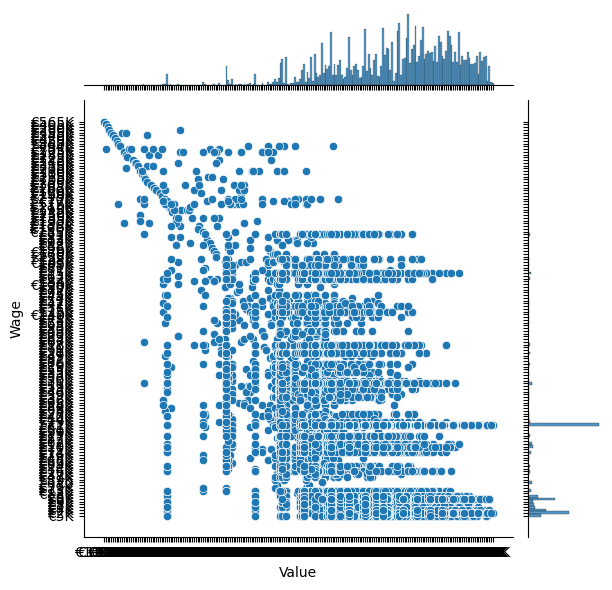

In [20]:
sns.jointplot(data=dataframe,x='Value',y='Wage')



# Number of players evaluated by there work rate ?

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

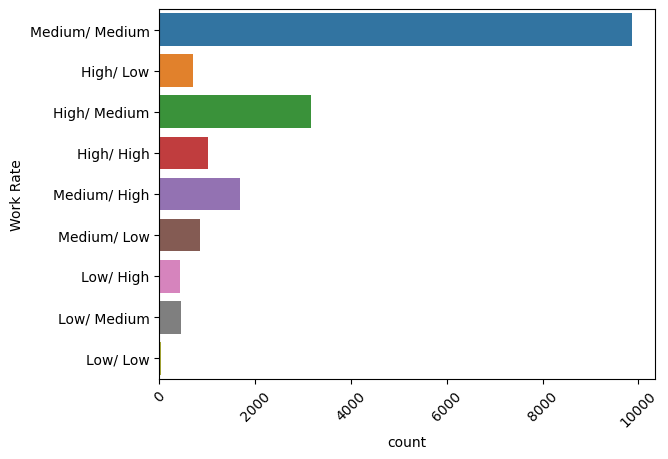

In [19]:
sns.countplot(data=dataframe,y='Work Rate')
plt.xticks(rotation=45)


# Finding the maximum stamina from each player

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

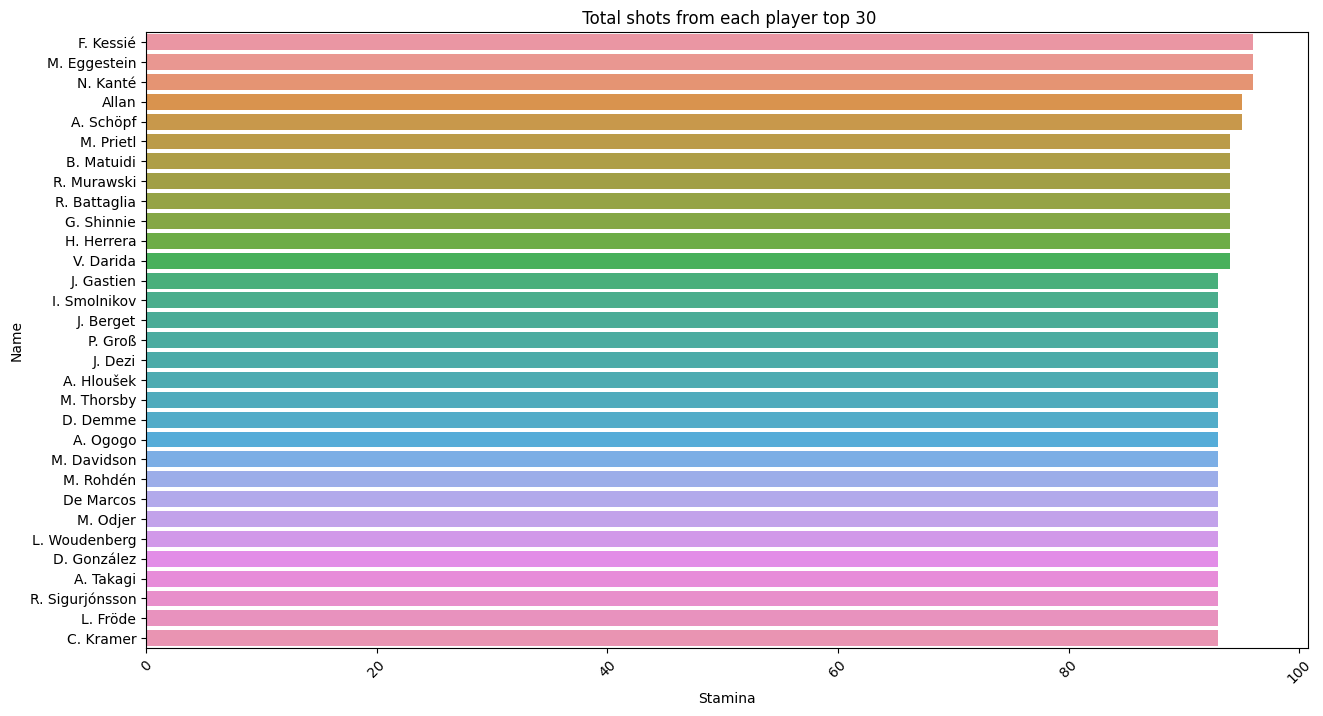

In [22]:
max_stamina = dataframe.groupby('Name')[['Stamina']].max().sort_values(by='Stamina',ascending = False).head(31)
plt.figure(figsize=[15,8])
sns.barplot(x=max_stamina['Stamina'],y=max_stamina.index)
plt.title(' Total shots from each player top 30')
plt.xticks(rotation=45)

# What is the most preffered foot for the players

([<matplotlib.patches.Wedge at 0x7a51ba7251b0>,
 [Text(-0.8221795516509662, 0.7307672576456997, 'Right foot'),
  Text(0.822179551650966, -0.7307672576456998, 'Left foot')])

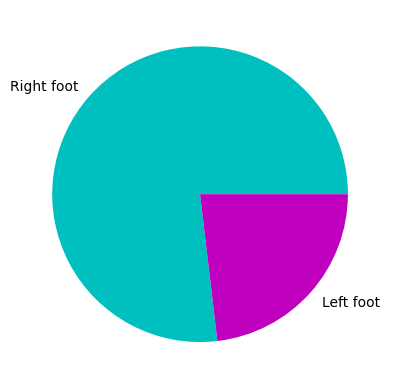

In [23]:
x=dataframe['Preferred Foot'].value_counts()
y=['Right foot','Left foot']
cols = ['c','m']
plt.pie(x,labels=y,colors=cols)
